# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [127]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [128]:
data = pd.read_csv("ex1data1.csv")

### Visualiser les données

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


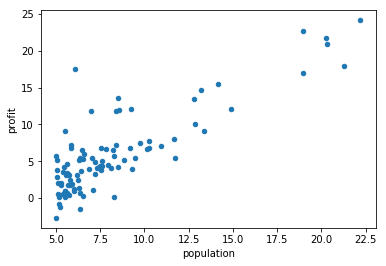

In [129]:
data.plot.scatter('population', 'profit')
data.head()

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [130]:
X = np.array(data['population']) 
y = np.array(data['profit'])
len(X)

97

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [180]:
theta = np.array([0.0, 0.0])

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [181]:
def predict(X, theta):
    return (theta[1] * X + theta[0])
    
    
    

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [182]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = len(X)
    
    
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        theta0 = theta[0]
        theta1 = theta[1]
        
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        theta[0] = theta0 - alpha / m * np.sum(predict(X, theta) - y)
        theta[1] = theta1 - alpha / m * np.dot((predict(X, theta) - y), np.transpose(X))
        

    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [183]:
res = fit(X, y, theta, 0.01, 1500)
print(res)

[-3.63606348  1.16698916]


## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [184]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

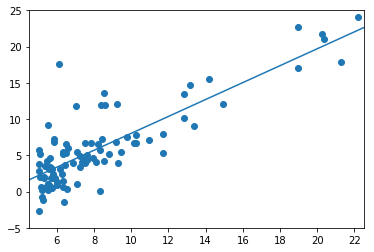

In [185]:
visualize(theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [186]:
def cost(X, y, theta):
    return (1 / 2 / len(X) * np.sum(np.square(predict(X, theta) - y)))

### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [187]:
cost(X, y, [0, 0])

32.072733877455676

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [188]:
cost(X, y, [-1, 2])

54.24245508201238

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [189]:
def fit_with_cost(X, y, theta, alpha, num_iters):
   # À compléter
    # Initialiser certaines variable utiles
    m = len(X)
    J_history = []
    
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        theta0 = theta[0]
        theta1 = theta[1]
        
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        theta[0] = theta0 - alpha / m * np.sum(predict(X, theta) - y)
        theta[1] = theta1 - alpha / m * np.dot((predict(X, theta) - y), np.transpose(X))
        J_history.append(cost(X, y, theta))
    return (theta, J_history)

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [190]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [191]:
# Lancez l'entraînement avec votre nouvelle fonction
theta, J_history = fit_with_cost(X, y, theta, 0.01, 15000)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

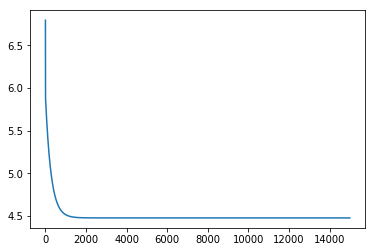

In [192]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

# Exercices Numpy

 ## La suite d'exercices suivants a pour but de vous faire comprendre le fonctionnement des numpy array et leurs avantages/defaults par rapport aux listes de python.

### Creez une liste A nommée "list_A" contenant les éléments (0, 1, 1, 2, 3, 5, 8). A partir de cette liste créez un numpy array nommé "np_A"

In [114]:
list_A = [0, 1, 1, 2, 3, 5, 7]
np_A = np.array(list_A)
print(list_A)
print(np_A)

[0, 1, 1, 2, 3, 5, 7]
[0 1 1 2 3 5 7]


### Affichez votre numpy array. Ainsi que : sa forme, sa taille, sa dimension et son type

In [104]:
print(np_A.dtype)
print(np_A.shape)
print(np_A.size)


int64
(7,)
7


### Ajoutez 2 a chaque element de la liste "list_A"

In [111]:
list_A = [x + 2 for x in list_A]
print(list_A)

[2, 3, 3, 4, 5, 7, 9]


### Ajoutez 2 a chaque élément de votre numpy array (votre solution ne doit pas utiliser de boucles)

In [115]:
np_A = np_A + 2
print(np_A)

[2 3 3 4 5 7 9]


### Calculez la somme de tous les éléments de "np_A" (sans utiliser de boucle)

In [116]:
np.sum(np_A)

33

### Convertissez les elements de votre numpy array en float

In [151]:
np_A.astype(np.float64)

array([2., 3., 3., 4., 5., 7., 9.])

### Convertissez votre numpy array en une liste python

In [153]:
np_A.tolist()

[2, 3, 3, 4, 5, 7, 9]

### Exécutez les trois cellules suivantes pour visualiser les matrices M et N

In [154]:
M = np.random.randint(10, size=(4,4))
N = np.random.randint(10, size=(4,4))

In [155]:
M

array([[6, 0, 6, 1],
       [3, 6, 2, 7],
       [3, 3, 7, 3],
       [5, 4, 2, 8]])

In [156]:
N

array([[1, 0, 3, 3],
       [3, 0, 2, 7],
       [7, 5, 0, 2],
       [7, 8, 1, 9]])

### Aditionnez les deux matrices

In [160]:
M + N

array([[ 7,  0,  9,  4],
       [ 6,  6,  4, 14],
       [10,  8,  7,  5],
       [12, 12,  3, 17]])

### Calculez le produit matriciel de M et N. Vérifiez votre opération en calculant les premières cellules à la main

In [161]:
M * N

array([[ 6,  0, 18,  3],
       [ 9,  0,  4, 49],
       [21, 15,  0,  6],
       [35, 32,  2, 72]])

### ** Bonus: Écrivez vous-mêmes une fonction de produit matriciel, avec des boucles imbriquées 

### ** Comparez son temps de calcul à la fonction de numpy avec de très grosses matrices en entrée

## Aller plus loin avec numpy (optionnal)

### Creez une liste a deux dimension ((1,2,3), (2,1,3), (3,2,1), (1,3,2)) nommée "list_B". Convertissez le en numpy array "np_B"

### Extrayez les deux premiere lignes et colonnes de "np_B". En sortie on obtient ((1,2),(2,1))

### Creez un masque qui montre toutes les valeurs egales a 1. 

### Pour toutes les valeurs du masque multipliez la valeur par 3

### Creez un nouveau numpy array "np_C" avec les valeurs (0, 0, 1, 2, 3, 5, 8) (en 1 dimension)

### Trouvez le minimum, maximum et la moyenne du numpy array "np_C"

### Creez une fonction qui prend un nombre en parametre et renvoie son carré. Appliquez cette fonction a chaque element de votre numpy array a l'aide de la fonction vectorize 

### Changez la dimension cd "np_B" pour qu'elle passe de 4 * 3 a 3 * 4

### Changez la dimension de np_B pour passer a un numpy array d'une seule dimension (flatten, ravel)

### Travail sur une image

In [ ]:
#install scikit-image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
photo = io.imread("cat.jpeg")
plt.imshow(photo)

### A l'aide du slicing inversez l'orientation de l'image (le bas est en haut)

### A l'aide du slicing créez un mirroir de l'image d'origine

### A l'aide de np.where appliquez un masque qui converti les pixels en dessous de 100 en 0 et au dessus en 255

### Transposez l'image

Pour ceux souhaitant aller plus loin sur numpy quelques pistes intéressantes qui restent à explorer : les séquences, le sampling avec random choice, uniqs et count

## En résumé les numpy array ont les particularités suivantes :
- ils supportent des operations vectorizées (opérations sur chaque élements de la matrice)
- la taille d'un numpy array ne peux etre changé
- il n'y a qu'un type de donnée dans un numpy array
- ils prennent beaucoup moins de place 